In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors.kde import KernelDensity

# Load and format the data

In [2]:
# Load the saved data into a data frame
dataFrame = pd.read_csv('ParameterData.csv', header=0, index_col=0, sep=',')

In [6]:
# Group by classification
groups = dataFrame.groupby( dataFrame.columns[-1] )
successGroup = groups.get_group(1)
failureGroup = groups.get_group(0)

In [8]:
# List of column headers for indexing and labels
params = dataFrame.columns.tolist()[:-1]

# Plot

C:\Users\dsarg\Anaconda3\envs\py35qt4\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


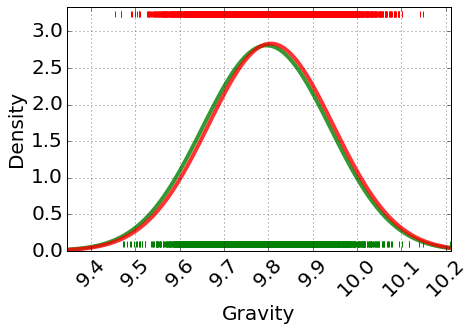

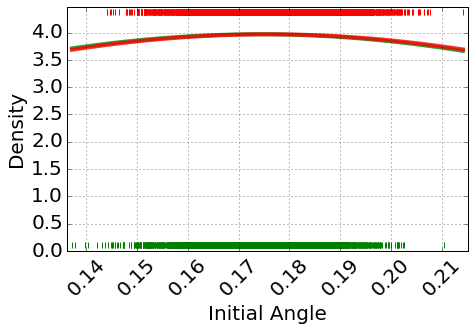

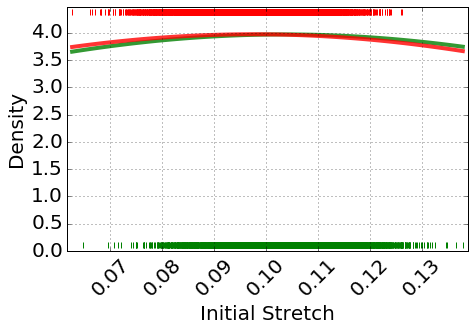

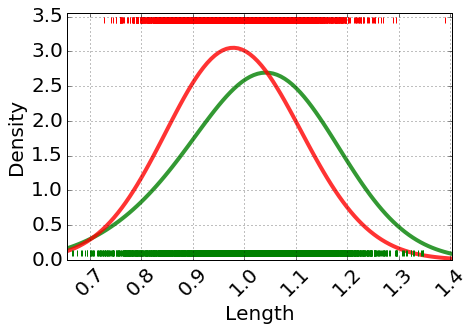

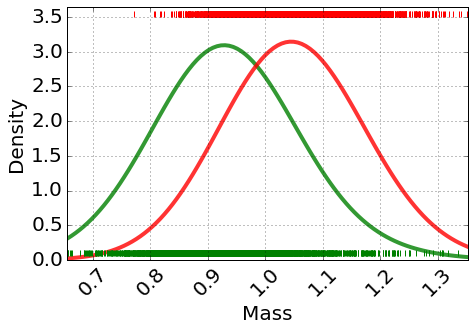

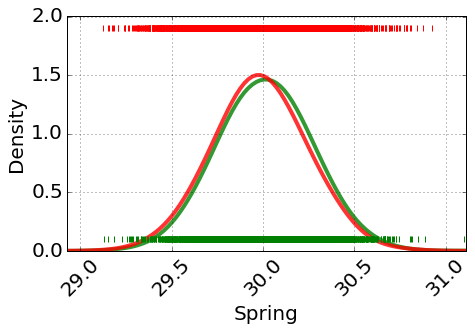

In [33]:
kernel = 'gaussian'
bandwidth = 0.1
 
plt.rc('font', size=20)
plt.rcParams.update({'figure.autolayout': True})

for num in range(len(params)):
    
    param = params[num]
    successes = successGroup[param]
    failures = failureGroup[param]
    plt.figure( figsize=(7,5))
    
    # Create the np.linspace array of x-values for plotting
    minX = min(successes)
    maxX = max(successes)
        
    if min(failures) < minX:
        minX = min(failures)

    if max(failures) > maxX:
        maxX = max(failures)

    xArray = np.linspace(minX, maxX, 100) 
        
    # Fit the kernel density models     
    successKDE = KernelDensity( kernel=kernel, bandwidth=bandwidth ).fit( successes.values.reshape(-1,1) )     
    failureKDE = KernelDensity( kernel=kernel, bandwidth=bandwidth ).fit( failures.values.reshape(-1,1) )
        
    # Get an array of the log densities for the xArray for graphing   
    successLogScores = successKDE.score_samples( xArray.reshape(-1,1) )                     
    failureLogScores = failureKDE.score_samples( xArray.reshape(-1,1) )

    # Plot KDE's
    line_1 = plt.plot(xArray, np.exp(successLogScores), color='green', linewidth=4, alpha=0.8)
    line_2 = plt.plot(xArray, np.exp(failureLogScores), color='red', linewidth=4, alpha=0.8)
    
    # Plot some of the successes and failures along the bottom for visual comparison to the KDES generated
    maxY = max( line_1[0].get_ydata() )
    if max( line_2[0].get_ydata() ) > maxY:
        maxY = max( line_2[0].get_ydata() )
    
    plt.xlim(minX-0.001, maxX+0.001)
    plt.ylim(0, maxY+0.5)
    plt.xlabel(param)
    plt.ylabel('Density')
    plt.xticks( rotation=45)
    plt.grid()
    plt.plot(successes, np.full_like(successes, 0.1), '|k', color='green', markeredgewidth=1.0)
    plt.plot(failures, np.full_like(failures, maxY+0.4), '|k', color='red', markeredgewidth=1.0)
    plt.savefig('KDE_'+param+'.png')
    plt.show()